## **Load Data**

In [35]:
import pandas as pd
data = pd.read_csv('/content/twitter_dataset.csv')
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21
...,...,...,...,...,...,...
9995,9996,ntate,Agree reflect military box ability ever hold. ...,81,86,2023-01-15 11:46:20
9996,9997,garrisonjoshua,Born which push still. Degree sometimes contro...,73,100,2023-05-06 00:46:54
9997,9998,adriennejackson,You day agent likely region. Teacher data mess...,10,62,2023-02-27 14:55:08
9998,9999,kcarlson,Guess without successful save. Particular natu...,21,60,2023-01-09 16:09:35


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet_ID   10000 non-null  int64 
 1   Username   10000 non-null  object
 2   Text       10000 non-null  object
 3   Retweets   10000 non-null  int64 
 4   Likes      10000 non-null  int64 
 5   Timestamp  10000 non-null  object
dtypes: int64(3), object(3)
memory usage: 468.9+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
data.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Tweet_ID,Retweets,Likes
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,49.721200,49.929300
std,2886.89568,28.948856,28.877193
min,1.00000,0.000000,0.000000
25%,2500.75000,25.000000,25.000000
50%,5000.50000,49.000000,50.000000
75%,7500.25000,75.000000,75.000000
max,10000.00000,100.000000,100.000000


## **Data Pre-processing**

In [38]:
import re
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)  # Remove special characters
    return text
data['Clean_Text'] = data['Text'].apply(clean_text)
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Tweet_ID,Username,Text,Retweets,Likes,Timestamp,Clean_Text
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51,party least receive say or single prevent prev...
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58,hotel still congress may member staff media dr...
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19,nice be her debate industry that year film whe...
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29,laugh explain situation career occur serious f...
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21,involve sense former often approach government...


In [39]:
import nltk
nltk.download('punkt')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
from nltk.tokenize import word_tokenize
data['Tokens'] = data['Clean_Text'].apply(word_tokenize)
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Tweet_ID,Username,Text,Retweets,Likes,Timestamp,Clean_Text,Tokens
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51,party least receive say or single prevent prev...,"[party, least, receive, say, or, single, preve..."
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58,hotel still congress may member staff media dr...,"[hotel, still, congress, may, member, staff, m..."
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19,nice be her debate industry that year film whe...,"[nice, be, her, debate, industry, that, year, ..."
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29,laugh explain situation career occur serious f...,"[laugh, explain, situation, career, occur, ser..."
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21,involve sense former often approach government...,"[involve, sense, former, often, approach, gove..."


In [41]:
import nltk
nltk.download('stopwords')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
data['Tokens'] = data['Tokens'].apply(lambda x: [word for word in x if word not in stop_words])
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Tweet_ID,Username,Text,Retweets,Likes,Timestamp,Clean_Text,Tokens
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51,party least receive say or single prevent prev...,"[party, least, receive, say, single, prevent, ..."
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58,hotel still congress may member staff media dr...,"[hotel, still, congress, may, member, staff, m..."
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19,nice be her debate industry that year film whe...,"[nice, debate, industry, year, film, generatio..."
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29,laugh explain situation career occur serious f...,"[laugh, explain, situation, career, occur, ser..."
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21,involve sense former often approach government...,"[involve, sense, former, often, approach, gove..."


In [43]:
import nltk
nltk.download('wordnet')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [44]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
data['Tokens'] = data['Tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Tweet_ID,Username,Text,Retweets,Likes,Timestamp,Clean_Text,Tokens
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51,party least receive say or single prevent prev...,"[party, least, receive, say, single, prevent, ..."
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58,hotel still congress may member staff media dr...,"[hotel, still, congress, may, member, staff, m..."
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19,nice be her debate industry that year film whe...,"[nice, debate, industry, year, film, generatio..."
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29,laugh explain situation career occur serious f...,"[laugh, explain, situation, career, occur, ser..."
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21,involve sense former often approach government...,"[involve, sense, former, often, approach, gove..."


In [46]:
# Convert tokens to space-separated strings for BERTopic
data['Tokens_Str'] = data['Tokens'].apply(lambda tokens: ' '.join(tokens))
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Tweet_ID,Username,Text,Retweets,Likes,Timestamp,Clean_Text,Tokens,Tokens_Str
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51,party least receive say or single prevent prev...,"[party, least, receive, say, single, prevent, ...",party least receive say single prevent prevent...
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58,hotel still congress may member staff media dr...,"[hotel, still, congress, may, member, staff, m...",hotel still congress may member staff medium d...
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19,nice be her debate industry that year film whe...,"[nice, debate, industry, year, film, generatio...",nice debate industry year film generation push...
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29,laugh explain situation career occur serious f...,"[laugh, explain, situation, career, occur, ser...",laugh explain situation career occur serious f...
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21,involve sense former often approach government...,"[involve, sense, former, often, approach, gove...",involve sense former often approach government...


## **Bag-of-Words and TF-IDF**

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
data = data['Tokens'].apply(lambda tokens: ' '.join(tokens))

# For Bag-of-Words
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(), lowercase=False)
bow_matrix = vectorizer.fit_transform(data)

# For TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(data)
feature_names = tfidf_vectorizer.get_feature_names_out()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [12]:
print("BoW Matrix:\n", bow_matrix.toarray())
print("TF-IDF Matrix:\n", tfidf_matrix.toarray())
print("Feature Names:\n", feature_names)

BoW Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]
TF-IDF Matrix:
 [[0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.1623616]
 [0.        0.        0.        ... 0.        0.        0.       ]]
Feature Names:
 ['ability' 'able' 'accept' 'according' 'account' 'across' 'act' 'action'
 'activity' 'actually' 'add' 'address' 'administration' 'admit' 'adult'
 'affect' 'age' 'agency' 'agent' 'ago' 'agree' 'agreement' 'ahead' 'air'
 'allow' 'almost' 'alone' 'along' 'already' 'also' 'although' 'always'
 'american' 'among' 'amount' 'analysis' 'animal' 'another' 'answer'
 'anyone' 'anything' 'appear' 'apply' 'approach' 'area' 'argue' 'arm'


## **LDA**

In [13]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_matrix = lda_model.fit_transform(tfidf_matrix)

In [14]:
print("Perplexity: ", lda_model.perplexity(tfidf_matrix))

Perplexity:  2188.9267817004393


## **Top 10 Topics**

In [15]:
# Function to display topics and their top words
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
# Print the topics and their top words
no_top_words = 10
display_topics(lda_model, feature_names, no_top_words)

Topic 0:
strong purpose mean benefit mr type crime worker sport trade
Topic 1:
play go glass defense safe mr development far read tend
Topic 2:
one community international three professional best suggest natural difficult someone
Topic 3:
start alone door continue finally account house national meeting world
Topic 4:
concern create responsibility prepare sense audience clear rest hand population
Topic 5:
mother summer practice science chance serve firm manager people growth
Topic 6:
five suddenly apply spring result since catch business rather simply
Topic 7:
artist experience production thought performance member radio person next particular
Topic 8:
sister especially country truth kind line thus meet road event
Topic 9:
safe mother example sister democratic international author wrong create hair


## **LDA Visualization**

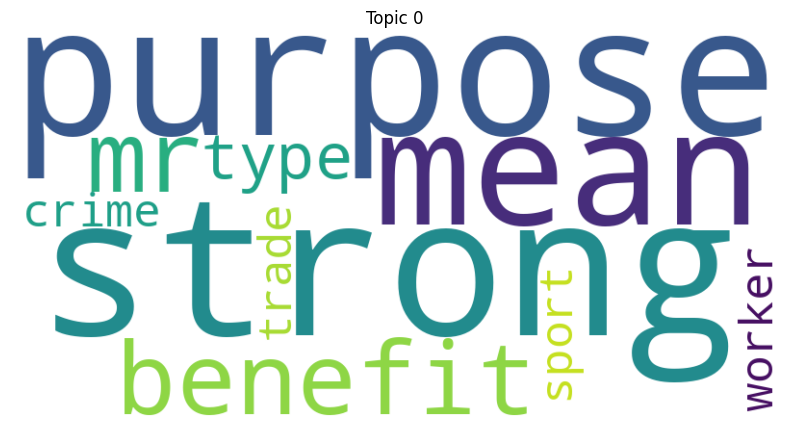

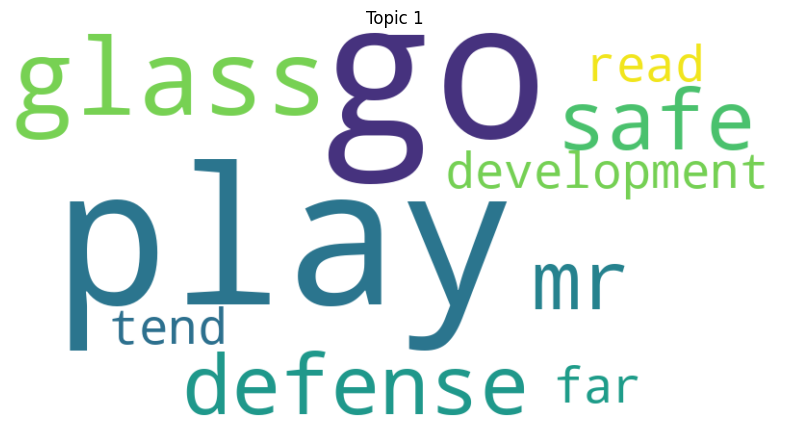

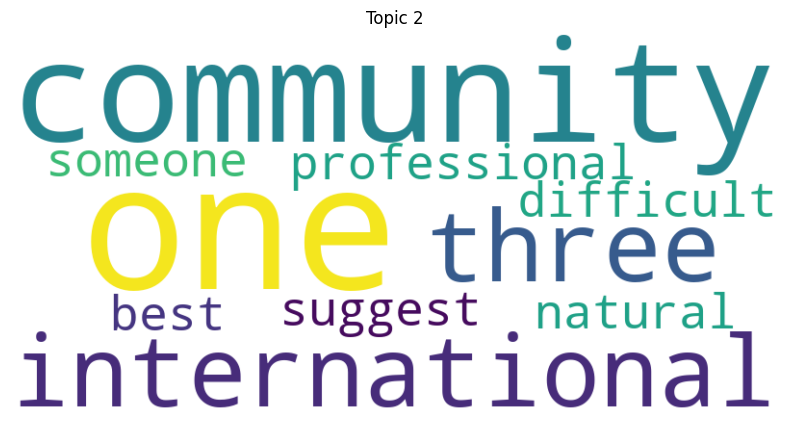

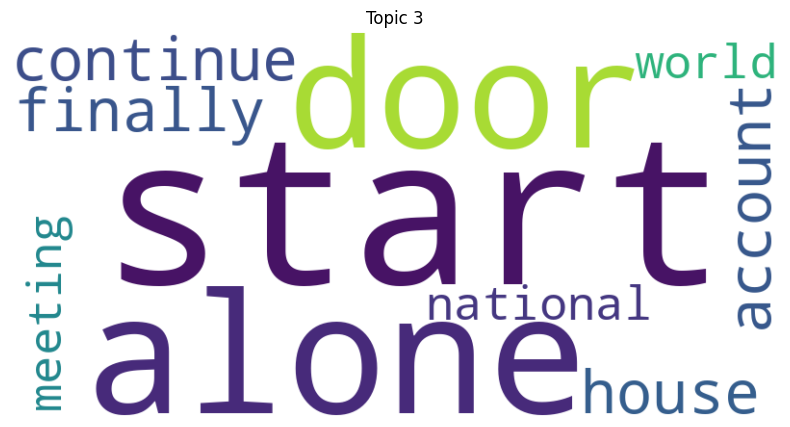

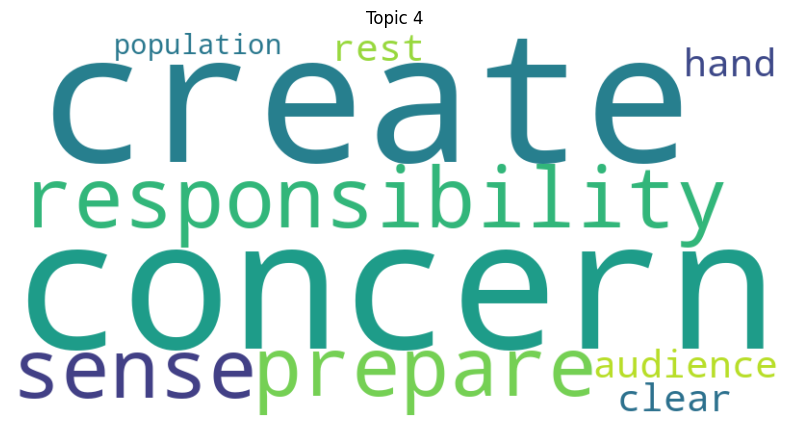

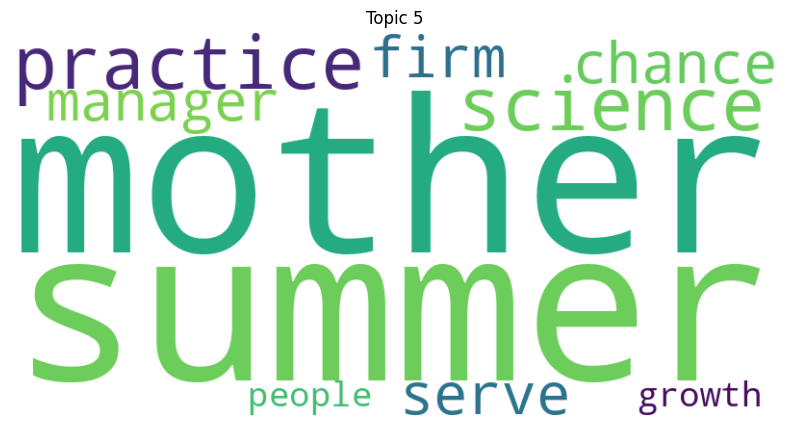

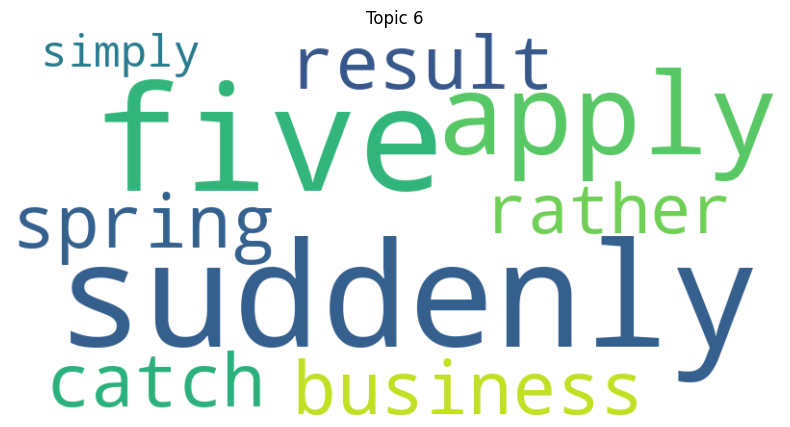

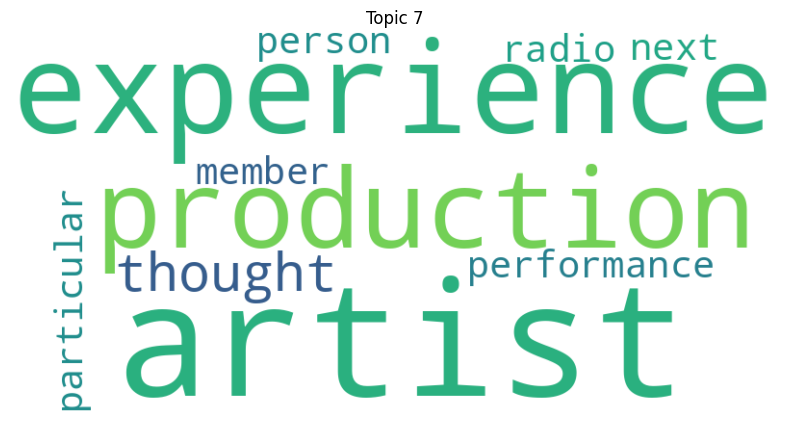

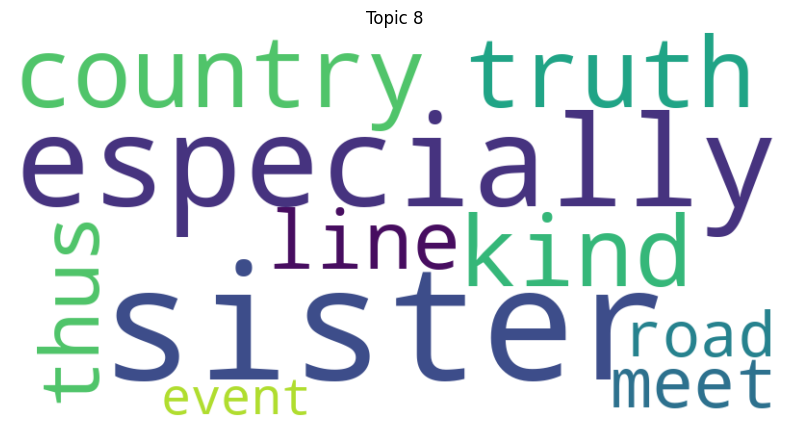

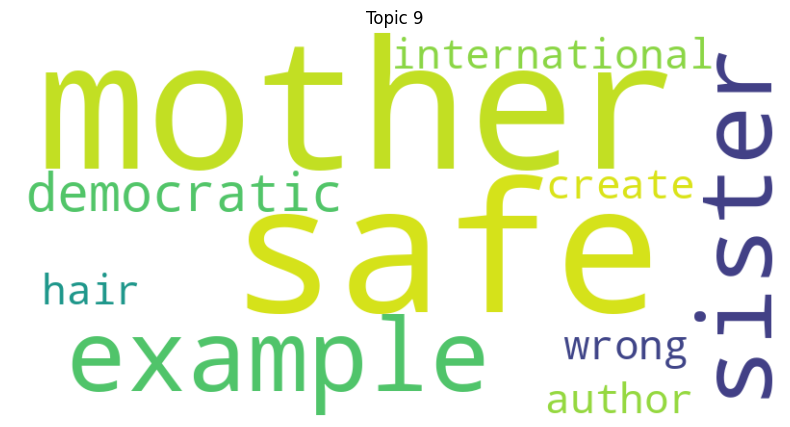

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Function to generate and display word clouds
def generate_wordclouds(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(' '.join(topic_words))
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"Topic {topic_idx}")
        plt.axis('off')
        plt.show()
# Print the topics and their top words
no_top_words = 10
# Generate and display word clouds
generate_wordclouds(lda_model, feature_names, no_top_words)

In [17]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 26.5 MB/s eta 0:00:00


In [18]:
import pyLDAvis
import pyLDAvis.lda_model

# Enable notebook display for pyLDAvis
pyLDAvis.enable_notebook()
# Prepare the visualization using the correct sklearn module
lda_vis = pyLDAvis.lda_model.prepare(lda_model, tfidf_matrix, tfidf_vectorizer)
# Display the visualization
pyLDAvis.display(lda_vis)

## **BERT**

In [19]:
!pip install bertopic
!pip install umap-learn
!pip install hdbscan

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB

In [20]:
from bertopic import BERTopic
import umap
import hdbscan

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/skimage/util/dtype.py:27: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),


In [48]:
# BERTopic Model
topic_model = BERTopic(umap_model=umap.UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine'), hdbscan_model=hdbscan.HDBSCAN(min_cluster_size=10))
topics, probabilities = topic_model.fit_transform(data['Tokens_Str'].tolist())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

## **BERTopic Visualization**

In [49]:
# BERTopic Visualization
topic_model.visualize_topics()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [50]:
# Display BERTopic results
for i, topic in enumerate(topic_model.get_topic_info().head(10).itertuples()):
    print(f"Topic {i}: {topic.Name}")

Topic 0: -1_mr_teach_add_scene
Topic 1: 0_song_music_sing_laugh
Topic 2: 1_republican_democrat_democratic_night
Topic 3: 2_marriage_father_husband_wife
Topic 4: 3_dog_animal_help_agency
Topic 5: 4_crime_police_gun_law
Topic 6: 5_soldier_military_war_budget
Topic 7: 6_teacher_professor_student_education
Topic 8: 7_attorney_lawyer_court_radio
Topic 9: 8_brother_rock_listen_network


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## **Distance between LDA and BERT**

In [55]:
from sklearn.metrics import pairwise_distances_argmin_min
import numpy as np

# Extract words and their scores from BERTopic topics
bert_topic_vectors = []
for topic in bert_topics:
    if isinstance(topic, list) and topic != -1:  # Ensure the topic is a list and not -1
        print("Topic:", topic)
        # Extract the scores for each word in the topic
        scores = [word[1] for word in topic if isinstance(word, tuple)]
        print("Scores:", scores)
        # Normalize the length of vectors by padding with zeros if necessary
        if len(scores) < len(feature_names):
            scores.extend([0] * (len(feature_names) - len(scores)))
        bert_topic_vectors.append(scores[:len(feature_names)])
    else:
        bert_topic_vectors.append([0] * len(feature_names))  # Add a zero vector for missing or unlabeled topics

# Ensure the bert_topic_vectors is a numpy array
bert_topic_vectors = np.array(bert_topic_vectors)

# Ensure lda_topics is also a numpy array
lda_topics = np.array(lda_topics)

# Calculate distances between LDA and BERTopic topic representations
_, min_distances = pairwise_distances_argmin_min(lda_topics, bert_topic_vectors)

print("Average minimum distance between LDA and BERTopic topics: ", min_distances.mean())

Average minimum distance between LDA and BERTopic topics:  196.32678571017806


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

